# Towards a Piecewise-Homogeneous Metamaterial Model of the Collision of Two Linearly Polarized Gravitational Plane Waves by Mackay and Lakhtakia
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 21, 2022

https://arxiv.org/pdf/1408.0601.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [12]:
t,x,y,z,dt,dx,dy,dz,sigma = symbols('t x y z dt dx dy dz sigma')

In [4]:
Fp = Function('F_+')(t)
Fp

In [13]:
equation3a = Eq(Fp,1 + sigma * sin(t))
equation3a

In [7]:
Fm = Function('F_-')(t)
Fm

In [14]:
equation3b = Eq(Fm,1 - sigma * sin(t))
equation3b

In [8]:
variables = Matrix([t,x,y,z])
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [9]:
differentials = Matrix([dt,dx,dy,dz])
differentials 

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [10]:
lineElement1 = expand( Fp**2 * (dt**2 - dz**2) +(Fm/Fp)*dx**2 + cos(z)**2 * Fp**2 * dy**2 )
lineElement1

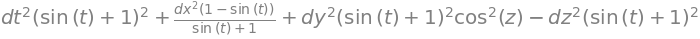

In [18]:
#  See description under equation 3 for the choice of sigma as plus one 
lineElement = lineElement1.subs(equation3a.lhs,equation3a.rhs).subs(equation3b.lhs,equation3b.rhs).subs(sigma,1)
lineElement

In [19]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            2                                                   ⎤
⎢(sin(t) + 1)       0                 0                  0       ⎥
⎢                                                                ⎥
⎢               1 - sin(t)                                       ⎥
⎢      0        ──────────            0                  0       ⎥
⎢               sin(t) + 1                                       ⎥
⎢                                                                ⎥
⎢                                       2    2                   ⎥
⎢      0            0       (sin(t) + 1) ⋅cos (z)        0       ⎥
⎢                                                                ⎥
⎢                                                               2⎥
⎣      0            0                 0            -(sin(t) + 1) ⎦

In [20]:
import sympy

In [21]:
m = sympy.Array(g)
m

⎡            2                                                   ⎤
⎢(sin(t) + 1)       0                 0                  0       ⎥
⎢                                                                ⎥
⎢               1 - sin(t)                                       ⎥
⎢      0        ──────────            0                  0       ⎥
⎢               sin(t) + 1                                       ⎥
⎢                                                                ⎥
⎢                                       2    2                   ⎥
⎢      0            0       (sin(t) + 1) ⋅cos (z)        0       ⎥
⎢                                                                ⎥
⎢                                                               2⎥
⎣      0            0                 0            -(sin(t) + 1) ⎦

In [22]:
from einsteinpy.symbolic import *

In [24]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [25]:
metric = MetricTensor(m,syms)

In [26]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡  cos(t)                                               ⎤                                                                             
⎢⎢──────────        0               0              0     ⎥                                                                             
⎢⎢sin(t) + 1                                             ⎥                                                                ⎡            
⎢⎢                                                       ⎥  ⎡         -1         ⎤  ⎡                 cos(t)           ⎤  ⎢    0       
⎢⎢                cos(t)                                 ⎥  ⎢  0     ──────  0  0⎥  ⎢    0       0  ──────────     0   ⎥  ⎢            
⎢⎢    0       ─────────────         0              0     ⎥  ⎢        cos(t)      ⎥  ⎢               sin(t) + 1         ⎥  ⎢            
⎢⎢                        4                              ⎥  ⎢                    ⎥  ⎢                                  ⎥  ⎢    0       
⎢⎢            (sin(t) + 1)                      

In [27]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [28]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [29]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [30]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                        ⎡                2⋅sin(t) - 2      ⎤  ⎡                   2        ⎤                          
⎢                                        ⎢      0        ─────────────  0  0⎥  ⎢                cos (z)     ⎥   ⎡                     -
⎢                                        ⎢                           4      ⎥  ⎢    0       0  ──────────  0⎥   ⎢    0       0  0  ────
⎢             ⎡0  0  0  0⎤               ⎢               (sin(t) + 1)       ⎥  ⎢               sin(t) + 1   ⎥   ⎢                  sin(
⎢             ⎢          ⎥               ⎢                                  ⎥  ⎢                            ⎥   ⎢                      
⎢             ⎢0  0  0  0⎥               ⎢ 2 - 2⋅sin(t)                     ⎥  ⎢    0       0      0       0⎥   ⎢    0       0  0      
⎢             ⎢          ⎥               ⎢─────────────        0        0  0⎥  ⎢                            ⎥   ⎢                      
⎢             ⎢0  0  0  0⎥               ⎢      

In [31]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                       ⎡                2⋅(sin(t) - 1)      ⎤                                         
⎢                                                       ⎢      0         ──────────────  0  0⎥                                         
⎢                                                       ⎢                            2       ⎥      ⎡                                  
⎢                   ⎡0  0  0  0⎤                        ⎢                (sin(t) + 1)        ⎥      ⎢          0            0  (sin(t) 
⎢                   ⎢          ⎥                        ⎢                                    ⎥      ⎢                                  
⎢                   ⎢0  0  0  0⎥                        ⎢2⋅(1 - sin(t))                      ⎥      ⎢          0            0          
⎢                   ⎢          ⎥                        ⎢──────────────        0         0  0⎥      ⎢                                  
⎢                   ⎢0  0  0  0⎥                